# مقدمة   

سنقوم من خلال هذا الدفتر بتطبيق ما تعلمناه في المقالة الثانية من سلسلة التبصير الحاسوبي

- أولا : سنقوم بإكتشاف الزاويا
- ثانيا : سنقوم بتطبيق إطار الصور لإكتشاف الزوايا
- ثالثاً : سنستخدم خوارزمية التجميع كا 

## كاشف الزوايا هاريس

لمعلومات أكثر عن هذا الكاشف بموسعكم قراءة هذا المقال 
[رابط المقال](https://medium.com/@deepanshut041/introduction-to-harris-corner-detector-32a88850b3f6)


سنتقوم بإستيراد الموارد التي سنحتاجها



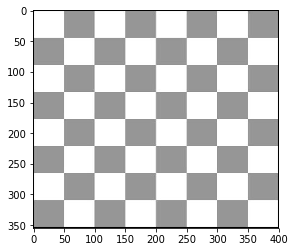

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# لجعل الصورة تظهر في الدفتر و ليس في نافذه جديدة
%matplotlib inline

#قراءة الصورة
image = cv2.imread('images/chessboard.jpg')

# عمل نسخة من الصورة

image_copy = np.copy(image)


# RGB تغيير الألوان إلى 

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# إظهار الصورة

plt.imshow(image_copy)

إكتشاف الحواف

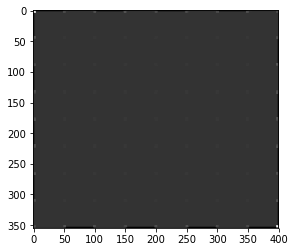

In [25]:
#  تحويل الصورة إلى الرمادي 

gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# إكتشاف الزوايا

dst = cv2.cornerHarris(gray, 3, 3,0.05)

# إجراء عملية التمدد لتحسين نقاط الزوايا في الصورة

dst = cv2.dilate(dst,None)

# إظهار الصورة

plt.imshow(dst, cmap='gray')


إستخراج و عرض الزوايا البارزه

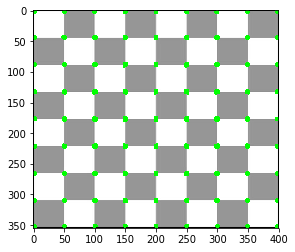

In [29]:
# تحديد مقدار العتبه
# هذا المقدار يختلف بإختلاف الصورة مما يعني بأن هذا المقدار نحن من نتحكم فيه

thresh = 0.001*dst.max()

# عمل نسخة من الصورة لرسم الزوايا عليه

corner_image = np.copy(image_copy)

# تكرار هذا ليشمل جميع الزوايا ورسمها على الصوةر

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # السماكة, اللون, نصف القطر, نقاط المركز, الصورة
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)
            
# إظهار الصورة

plt.imshow(corner_image)

بوسعكم تجريب هذا الكاشف  على صوره أخرى في مجموعة الصور وهي صورة الوافل 
 وذلك بتغير هذا الأمر في الخلية الأولى 
 
image = cv2.imread('images/chessboard.jpg')

إلى 

image = cv2.imread('images/waffle.jpg')


# إطار الصورة

سنتتقل الأن جزء أخر تحدثنا عن أهميته في المقالة و هو إطار الصورة و سنقوم الأن بتطبيقه

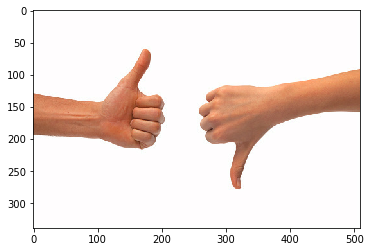

In [43]:
# قراءة الصورة
image = cv2.imread('images/thumbs_up_down.jpg')

# عمل نسخة من الصورة

image_copy = np.copy(image)

# RGB تغيير الألوان إلى 

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# إظهار الصورة

plt.imshow(image_copy)

## إنشاء صورة ثنائية

وهذه الصورة كما نعلم مكونه من اللونين الأسود و الأبيض

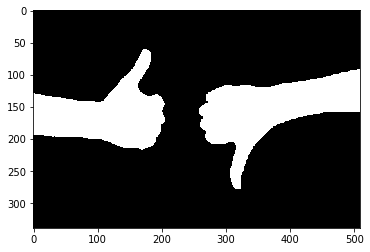

In [44]:
#  تحويل الصورة إلى الرمادي 

gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

# إنشاء عتبه  لترشيح كل النقاط الضوئية إلى الأبيض 
# فوق مدى معين 
# وبعد ذلك نحول الصورة إلى صورة ثنائية 
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# إظهار الصورة

plt.imshow(binary, cmap='gray')


### إيجاد ورسم الإطار

 cv2.findContours لإيجاد الإطار سنستخدم التابع 


- المتغير الأول يمثل صورة ثنائية وهي المدخل

- المتغير الثاني يمثل نمط إستيراد الإطار

- المتغير الثالث يمثل تقريب الإطار
 

و مخرجات التابع هي الإطارات و التسلسل الهرمي 

contours and hierarchy


  لرسم الإطار سنستخدم التابع cv2.drawContours

- المتغير الأول يمثل الصورة الأصلية

- المتغير الثاني هي لإطارات المطلوب رسمها 

- المتغير الثالث يمثل فهرس الإطارات و لرسم كل الإطارات نختار -1

- المتغيرات الأخرى هي اللون و السماكة


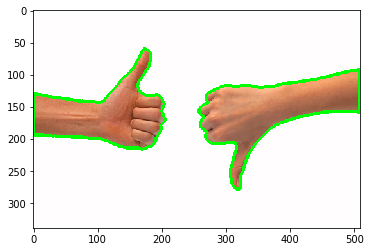

In [45]:
#  إيجاد الإطار من الصورة الثنائية المعتبة
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# رسم الإطار على الصورة الأصلية 
contours_image = image_copy
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

# خوارزمية التجميع المتوسط كا

سنتقل الأن إلى الجزء الأخير في هذا الدفتر و هو خوارزمية التجميع

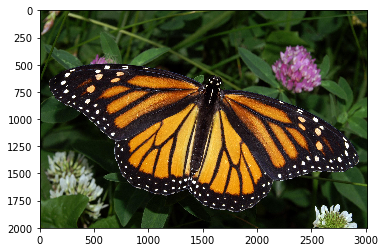

In [48]:
# قراءة الصورة
image = cv2.imread('images/monarch.jpg')

# RGB تغيير الألوان إلى 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# إظهار الصورة

plt.imshow(image)

## تجهيز البيانات من أجل الخوارزمية

In [50]:
#إعادة تشكيل النقاط الضوئية للصورة إلى مصفوفة ثنائية الأبعاد
# لديها ثلاث قنوات ألوان
pixel_vals = image.reshape((-1,3))

# تحويل نوع البيانات إلى فلوت 
pixel_vals = np.float32(pixel_vals)

## تطبيق الخوارزمية

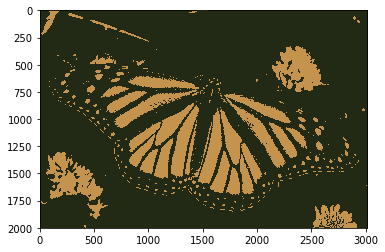

In [64]:
# تحديد معيار التوقف
# إما بعد 10 محاولات
# EPS=1.0 أو إذا ما تحركت مركز المجموعة بمقدار أقل من 

criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 10 , 1.0)

# k تطبيق نطام التحميع المتوسط 

#تحديد عدد المجموعات
k = 2 
#تطبيق الخوارزمية
retval , labels ,centers = cv2.kmeans(pixel_vals , k , None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS)

# تحويل البيانات إلى 8 بت

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# إعادة تشكيل البيانات لأبعاد الصورة الأصلية

segmented_image = segmented_data.reshape((image.shape))
label_reshape = labels.reshape(image.shape[0] , image.shape[1])

plt.imshow(segmented_image)

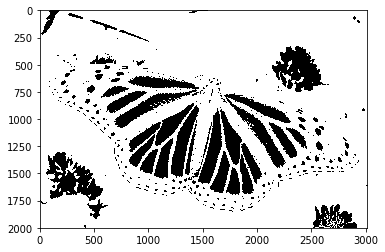

In [68]:
# عرض المجموعات بشكل فردي
plt.imshow(label_reshape==0, cmap='gray')

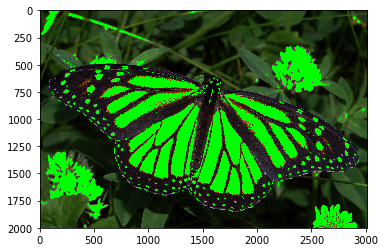

In [72]:
#عمل قناع للمجموعة

cluster = 1 # المجوعة المرغوبه

masked_image = np.copy(image)
# turn the mask green!
masked_image[label_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)